In [47]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 13.8 MB/s eta 0:00:00


In [123]:
import pandas as pd
from datetime import datetime
#check multicollinearity of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
df_flights = pd.read_csv("T_ONTIME_REPORTING.csv")

In [4]:
df_flights2 = df_flights.copy(deep=True)

In [5]:
df_flights.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FL_DATE,611132,30,6/21/2024 0:00,21235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,611132.0,NaN,NaN,NaN,19947.986186,371.470598,19393.0,19790.0,19930.0,20363.0,20452.0
OP_CARRIER_FL_NUM,611132.0,NaN,NaN,NaN,2531.827586,1650.672836,1.0,1165.0,2275.0,3794.0,8819.0
ORIGIN_AIRPORT_ID,611132.0,NaN,NaN,NaN,12635.064299,1534.864432,10135.0,11292.0,12889.0,14027.0,16869.0
ORIGIN_AIRPORT_SEQ_ID,611132.0,NaN,NaN,NaN,1263510.396099,153486.279623,1013506.0,1129202.0,1288904.0,1402702.0,1686902.0
ORIGIN_CITY_MARKET_ID,611132.0,NaN,NaN,NaN,31727.186294,1328.902452,30070.0,30615.0,31453.0,32467.0,35991.0
ORIGIN,611132,340,ATL,29361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEST_AIRPORT_ID,611132.0,NaN,NaN,NaN,12635.101899,1534.857077,10135.0,11292.0,12889.0,14027.0,16869.0
DEST_AIRPORT_SEQ_ID,611132.0,NaN,NaN,NaN,1263514.156156,153485.544155,1013506.0,1129202.0,1288904.0,1402702.0,1686902.0
DEST_CITY_MARKET_ID,611132.0,NaN,NaN,NaN,31727.248387,1328.926359,30070.0,30615.0,31453.0,32467.0,35991.0


In [6]:
df_flights.dtypes

,0
FL_DATE,object
OP_CARRIER_AIRLINE_ID,int64
OP_CARRIER_FL_NUM,int64
ORIGIN_AIRPORT_ID,int64
ORIGIN_AIRPORT_SEQ_ID,int64
ORIGIN_CITY_MARKET_ID,int64
ORIGIN,object
DEST_AIRPORT_ID,int64
DEST_AIRPORT_SEQ_ID,int64
DEST_CITY_MARKET_ID,int64


In [7]:
#drop column i dont need for lin reg
df_flights = df_flights.drop(columns=['OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID'])

In [8]:
df_flights = df_flights.drop(columns=['WHEELS_OFF','WHEELS_ON'])

In [9]:
df_flights = df_flights.drop(columns=['FLIGHTS','DIVERTED'])

In [10]:
df_flights = df_flights.drop(columns=['CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME'])

In [11]:
#drop rows where there is not a dept time or arr time
df_flights['CRS_DEP_TIME'].dropna(inplace=True)
df_flights['CRS_ARR_TIME'].dropna(inplace=True)
df_flights['CANCELLED'].dropna(inplace=True)

In [12]:
df_flights = df_flights.drop(columns=['CANCELLED','CANCELLATION_CODE'])

In [13]:
df_flights = df_flights.drop(columns=['FIRST_DEP_TIME','TOTAL_ADD_GTIME'])

In [14]:
df_flights = df_flights.drop(columns=['DEP_TIME','DEP_DELAY','TAXI_IN','TAXI_OUT','ARR_TIME','ARR_DELAY'])

In [15]:
df_flights = df_flights.drop(columns=['ARR_DELAY_NEW'])

In [16]:

df_flights['CARRIER_DELAY'].fillna(0, inplace=True)
df_flights['WEATHER_DELAY'].fillna(0, inplace=True)
df_flights['NAS_DELAY'].fillna(0, inplace=True)
df_flights['SECURITY_DELAY'].fillna(0, inplace=True)
df_flights['LATE_AIRCRAFT_DELAY'].fillna(0, inplace=True)
df_flights['DEP_DELAY_NEW'].fillna(0, inplace=True)


<ipython-input-16-333ecef60080>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flights['CARRIER_DELAY'].fillna(0, inplace=True)
<ipython-input-16-333ecef60080>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [17]:
#put into time format
df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].astype(str).apply(lambda x: x.zfill(4))

df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].astype(str).apply(lambda x: x.zfill(4))


In [18]:
def add_colon (string):
  return string [:-2] + ":" + string[-2:]

In [19]:
df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].apply(add_colon)

In [20]:
df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].apply(add_colon)

In [21]:
df_flights.dtypes

,0
FL_DATE,object
OP_CARRIER_AIRLINE_ID,int64
ORIGIN,object
DEST,object
CRS_DEP_TIME,object
DEP_DELAY_NEW,float64
CRS_ARR_TIME,object
DISTANCE,int64
CARRIER_DELAY,float64
WEATHER_DELAY,float64


In [79]:
df_flights.head(7)

,OP_CARRIER_AIRLINE_ID,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_NEW,CRS_ARR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,day_of_week,CRS_DEP_TIME_HR,CRS_ARR_TIME_HR,TOTAL_DELAY,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI
0,SouthWest Airlines,DAL,HOU,18:00,47.0,19:10,239,15.0,0.0,0.0,0.0,18.0,Saturday,18,19,80.0,1,0,0,0,1
1,SouthWest Airlines,HOU,CRP,20:00,12.0,21:05,187,0.0,0.0,0.0,0.0,0.0,Saturday,20,21,12.0,0,0,0,0,0
2,SouthWest Airlines,HOU,DAL,08:50,2.0,10:05,239,0.0,0.0,0.0,0.0,0.0,Saturday,08,10,2.0,0,0,0,0,0
3,SouthWest Airlines,MCO,IND,14:10,0.0,16:35,829,0.0,0.0,0.0,0.0,0.0,Saturday,14,16,0.0,0,0,0,0,0
4,SouthWest Airlines,MCO,BWI,09:40,0.0,12:00,787,0.0,0.0,0.0,0.0,0.0,Saturday,09,12,0.0,0,0,0,0,0
5,SouthWest Airlines,MCO,BWI,13:05,18.0,15:15,787,0.0,0.0,0.0,0.0,0.0,Saturday,13,15,18.0,0,0,0,0,0
6,SouthWest Airlines,MCO,BWI,15:55,0.0,18:15,787,0.0,0.0,0.0,0.0,0.0,Saturday,15,18,0.0,0,0,0,0,0


In [23]:
df_flights['FL_DATE'] = pd.to_datetime(df_flights['FL_DATE'])
df_flights['day_of_week'] = df_flights['FL_DATE'].dt.day_name()

In [24]:
#remove date col
df_flights.drop(columns=['FL_DATE'], inplace = True)

In [25]:
df_flights['CRS_DEP_TIME_HR'] = df_flights['CRS_DEP_TIME'].str.slice(0, 2)
df_flights['CRS_ARR_TIME_HR'] = df_flights['CRS_ARR_TIME'].str.slice(0, 2)

In [26]:
df_flights['TOTAL_DELAY'] = df_flights['DEP_DELAY_NEW'] + df_flights['CARRIER_DELAY'] + df_flights['NAS_DELAY'] + df_flights['WEATHER_DELAY'] + df_flights['SECURITY_DELAY'] + df_flights['LATE_AIRCRAFT_DELAY']

In [27]:
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19790, 'Delta Airline')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19805, 'American Airline')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20304, 'SkyWest Airline')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20436, 'Frontier Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20397, 'PSA Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20416, 'Spirit Air')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20409, 'JetBlue Airways')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19393, 'SouthWest Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19930, 'Alaska Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20452, 'Republic Airlines')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(20363, 'Endeavor Air')
df_flights['OP_CARRIER_AIRLINE_ID'] = df_flights['OP_CARRIER_AIRLINE_ID'].replace(19690, 'Hawaiian Airlines')

In [28]:
df_flights['CARRIER_DELAY_BI'] = df_flights['CARRIER_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['WEATHER_DELAY_BI'] = df_flights['WEATHER_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['NAS_DELAY_BI'] = df_flights['NAS_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['SECURITY_DELAY_BI'] = df_flights['SECURITY_DELAY'].apply(lambda x: 0 if x == 0 else 1)

df_flights['LATE_AIRCRAFT_DELAY_BI'] = df_flights['LATE_AIRCRAFT_DELAY'].apply(lambda x: 0 if x == 0 else 1)

In [84]:
df_flights2.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,TOTAL_DELAY
0,6/1/2024 0:00,19393,1,11259,1125904,30194,DAL,12191,1219103,31453,HOU,1800,1847,47.0,47.0,9.0,1856,1936,7.0,1910,1943,33.0,33.0,0,NaN,0,70,56.0,40.0,1,239,15.0,0.0,0.0,0.0,18.0,NaN,NaN,80.0
1,6/1/2024 0:00,19393,1,12191,1219103,31453,HOU,11140,1114008,31140,CRP,2000,2012,12.0,12.0,10.0,2022,2057,4.0,2105,2101,-4.0,0.0,0,NaN,0,65,49.0,35.0,1,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/1/2024 0:00,19393,10,12191,1219103,31453,HOU,11259,1125904,30194,DAL,850,852,2.0,2.0,8.0,900,943,3.0,1005,946,-19.0,0.0,0,NaN,0,75,54.0,43.0,1,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/1/2024 0:00,19393,1001,13204,1320402,31454,MCO,12339,1233904,32337,IND,1410,1409,-1.0,0.0,14.0,1423,1612,8.0,1635,1620,-15.0,0.0,0,NaN,0,145,131.0,109.0,1,829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/1/2024 0:00,19393,1002,13204,1320402,31454,MCO,10821,1082106,30852,BWI,940,939,-1.0,0.0,18.0,957,1138,5.0,1200,1143,-17.0,0.0,0,NaN,0,140,124.0,101.0,1,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_flights2['TOTAL_DELAY'] = df_flights2['DEP_DELAY_NEW'] + df_flights2['CARRIER_DELAY'] + df_flights2['NAS_DELAY'] + df_flights2['WEATHER_DELAY'] + df_flights2['SECURITY_DELAY'] + df_flights2['LATE_AIRCRAFT_DELAY']

In [100]:
delays_ts = pd.Series(df_flights2.TOTAL_DELAY.values,
index=df_flights2.FL_DATE,
name='delay minutes')

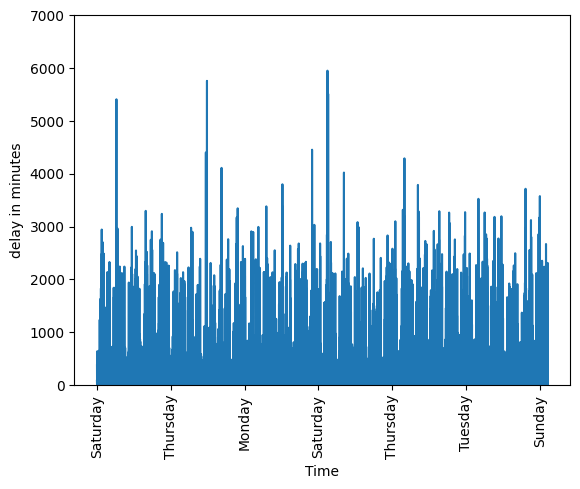

In [102]:
delays_graph = pd.Series(df_flights.TOTAL_DELAY.values,
index=df_flights.day_of_week,
name='delay minutes')

delay_days_plot = delays_graph.plot()
delay_days_plot.set_xlabel('Time')
delay_days_plot.set_ylabel('delay in minutes')
delay_days_plot.set_ylim(0,7000)
delay_days_plot.tick_params(axis='x', labelrotation=90)
plt.show()

In [139]:
avg_delay_x = df_flights['day_of_week']
avg_delay_y = df_flights['TOTAL_DELAY'].mean()

plt.bar(avg_delay_x, avg_delay_y, width = 0.4)
plt.xlabel('Time')
plt.ylabel('avg delay in minutes')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7daacb6ec1f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7daacb6b2e60> (for post_execute):


KeyboardInterrupt: 

In [52]:
dummy_data_origin = pd.get_dummies(df_flights[['ORIGIN']],drop_first=True)
dummy_data_origin.replace({False:0, True:1},inplace = True)

<ipython-input-52-1b7110e90e0d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_origin.replace({False:0, True:1},inplace = True)


In [53]:
dummy_data_dest = pd.get_dummies(df_flights[['DEST']],drop_first=True)
dummy_data_dest.replace({False:0, True:1}, inplace = True)

<ipython-input-53-a72d5afd2362>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_dest.replace({False:0, True:1}, inplace = True)


In [54]:
dummy_data_airline = pd.get_dummies(df_flights[['OP_CARRIER_AIRLINE_ID']],drop_first=True)
dummy_data_airline.replace({False:0, True:1}, inplace = True)

<ipython-input-54-d359c71d2eb9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_airline.replace({False:0, True:1}, inplace = True)


In [55]:
dummy_data_day = pd.get_dummies(df_flights[['day_of_week']],drop_first=True)
dummy_data_day.replace({False:0, True:1}, inplace = True)

<ipython-input-55-cca479c0018e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_day.replace({False:0, True:1}, inplace = True)


In [56]:
dummy_data_dephr= pd.get_dummies(df_flights[['CRS_DEP_TIME_HR']],drop_first=True)
dummy_data_dephr.replace({False:0, True:1}, inplace = True)

<ipython-input-56-13c85acddab9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_dephr.replace({False:0, True:1}, inplace = True)


In [57]:
dummy_data_arrhr= pd.get_dummies(df_flights[['CRS_ARR_TIME_HR']],drop_first=True)
dummy_data_arrhr.replace({False:0, True:1}, inplace = True)

<ipython-input-57-7f67b9af3927>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_data_arrhr.replace({False:0, True:1}, inplace = True)


In [68]:
#cols joining from main set
num_name = ['DISTANCE','CARRIER_DELAY_BI','WEATHER_DELAY_BI','NAS_DELAY_BI','SECURITY_DELAY_BI','LATE_AIRCRAFT_DELAY_BI']


In [69]:
#joing dummy sets with og set = model_data

df_origin_og = pd.concat([df_flights[num_name], dummy_data_origin],axis=1)
df_origin_og.describe(include='all')

,DISTANCE,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,...,ORIGIN_SWF,ORIGIN_SWO,ORIGIN_SYR,ORIGIN_TLH,ORIGIN_TOL,ORIGIN_TPA,ORIGIN_TRI,ORIGIN_TTN,ORIGIN_TUL,ORIGIN_TUS,ORIGIN_TVC,ORIGIN_TWF,ORIGIN_TXK,ORIGIN_TYR,ORIGIN_TYS,ORIGIN_USA,ORIGIN_VCT,ORIGIN_VLD,ORIGIN_VPS,ORIGIN_WRG,ORIGIN_WYS,ORIGIN_XNA,ORIGIN_XWA,ORIGIN_YAK,ORIGIN_YUM
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,843.917101,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,...,0.000057,0.000098,0.001973,0.000866,0.000043,0.010222,0.000304,0.000219,0.002543,0.002230,0.000835,0.000098,0.000098,0.000147,0.002400,0.00010,0.000083,0.000098,0.001867,0.000098,0.000101,0.001914,0.000278,0.000098,0.000193
std,603.182942,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,...,0.007568,0.009908,0.044379,0.029408,0.006522,0.100586,0.017443,0.014806,0.050362,0.047173,0.028876,0.009908,0.009908,0.012135,0.048936,0.00999,0.009135,0.009908,0.043169,0.009908,0.010072,0.043713,0.016676,0.009908,0.013894
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00

In [70]:
#joing dummy sets with og set = model_data

df_withdest = pd.concat([df_origin_og, dummy_data_dest],axis=1)
df_withdest.describe(include='all')

,DISTANCE,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,...,DEST_SWF,DEST_SWO,DEST_SYR,DEST_TLH,DEST_TOL,DEST_TPA,DEST_TRI,DEST_TTN,DEST_TUL,DEST_TUS,DEST_TVC,DEST_TWF,DEST_TXK,DEST_TYR,DEST_TYS,DEST_USA,DEST_VCT,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,843.917101,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,...,0.000057,0.000098,0.001975,0.000866,0.000043,0.010215,0.000306,0.000219,0.002541,0.002227,0.000838,0.000098,0.000098,0.000147,0.002400,0.00010,0.000083,0.000098,0.001867,0.000098,0.000101,0.001919,0.000278,0.000098,0.000193
std,603.182942,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,...,0.007568,0.009908,0.044397,0.029408,0.006522,0.100554,0.017490,0.014806,0.050346,0.047139,0.028932,0.009908,0.009908,0.012135,0.048936,0.00999,0.009135,0.009908,0.043169,0.009908,0.010072,0.043769,0.016676,0.009908,0.013894
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
df_withairline = pd.concat([df_withdest, dummy_data_airline],axis=1)
df_withairline.describe(include='all')

,DISTANCE,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,...,DEST_TYS,DEST_USA,DEST_VCT,DEST_VLD,DEST_VPS,DEST_WRG,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM,OP_CARRIER_AIRLINE_ID_20368,OP_CARRIER_AIRLINE_ID_20398,OP_CARRIER_AIRLINE_ID_Alaska Airlines,OP_CARRIER_AIRLINE_ID_American Airline,OP_CARRIER_AIRLINE_ID_Delta Airline,OP_CARRIER_AIRLINE_ID_Endeavor Air,OP_CARRIER_AIRLINE_ID_Frontier Airlines,OP_CARRIER_AIRLINE_ID_Hawaiian Airlines,OP_CARRIER_AIRLINE_ID_JetBlue Airways,OP_CARRIER_AIRLINE_ID_PSA Airlines,OP_CARRIER_AIRLINE_ID_Republic Airlines,OP_CARRIER_AIRLINE_ID_SkyWest Airline,OP_CARRIER_AIRLINE_ID_SouthWest Airlines,OP_CARRIER_AIRLINE_ID_Spirit Air
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000
mean,843.917101,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,...,0.002400,0.00010,0.000083,0.000098,0.001867,0.000098,0.000101,0.001919,0.000278,0.000098,0.000193,0.020010,0.041089,0.036270,0.140037,0.145738,0.027313,0.030511,0.010795,0.032567,0.030314,0.040096,0.101211,0.202603,0.03835
std,603.182942,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,...,0.048936,0.00999,0.009135,0.009908,0.043169,0.009908,0.010072,0.043769,0.016676,0.009908,0.013894,0.140036,0.198497,0.186962,0.347026,0.352843,0.162995,0.171988,0.103335,0.177502,0.171451,0.196185,0.301608,0.401939,0.19204
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [72]:
df_withday = pd.concat([df_withairline, dummy_data_day],axis=1)
df_withday.describe(include='all')

,DISTANCE,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,...,DEST_WYS,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM,OP_CARRIER_AIRLINE_ID_20368,OP_CARRIER_AIRLINE_ID_20398,OP_CARRIER_AIRLINE_ID_Alaska Airlines,OP_CARRIER_AIRLINE_ID_American Airline,OP_CARRIER_AIRLINE_ID_Delta Airline,OP_CARRIER_AIRLINE_ID_Endeavor Air,OP_CARRIER_AIRLINE_ID_Frontier Airlines,OP_CARRIER_AIRLINE_ID_Hawaiian Airlines,OP_CARRIER_AIRLINE_ID_JetBlue Airways,OP_CARRIER_AIRLINE_ID_PSA Airlines,OP_CARRIER_AIRLINE_ID_Republic Airlines,OP_CARRIER_AIRLINE_ID_SkyWest Airline,OP_CARRIER_AIRLINE_ID_SouthWest Airlines,OP_CARRIER_AIRLINE_ID_Spirit Air,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,843.917101,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,...,0.000101,0.001919,0.000278,0.000098,0.000193,0.020010,0.041089,0.036270,0.140037,0.145738,0.027313,0.030511,0.010795,0.032567,0.030314,0.040096,0.101211,0.202603,0.03835,0.138096,0.153368,0.169363,0.138335,0.130065,0.131919
std,603.182942,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,...,0.010072,0.043769,0.016676,0.009908,0.013894,0.140036,0.198497,0.186962,0.347026,0.352843,0.162995,0.171988,0.103335,0.177502,0.171451,0.196185,0.301608,0.401939,0.19204,0.345001,0.360342,0.375072,0.345252,0.336375,0.338403
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1075.

In [73]:
df_withdephr = pd.concat([df_withday, dummy_data_dephr],axis=1)
df_withdephr.describe(include='all')

,DISTANCE,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,...,day_of_week_Tuesday,day_of_week_Wednesday,CRS_DEP_TIME_HR_01,CRS_DEP_TIME_HR_02,CRS_DEP_TIME_HR_03,CRS_DEP_TIME_HR_04,CRS_DEP_TIME_HR_05,CRS_DEP_TIME_HR_06,CRS_DEP_TIME_HR_07,CRS_DEP_TIME_HR_08,CRS_DEP_TIME_HR_09,CRS_DEP_TIME_HR_10,CRS_DEP_TIME_HR_11,CRS_DEP_TIME_HR_12,CRS_DEP_TIME_HR_13,CRS_DEP_TIME_HR_14,CRS_DEP_TIME_HR_15,CRS_DEP_TIME_HR_16,CRS_DEP_TIME_HR_17,CRS_DEP_TIME_HR_18,CRS_DEP_TIME_HR_19,CRS_DEP_TIME_HR_20,CRS_DEP_TIME_HR_21,CRS_DEP_TIME_HR_22,CRS_DEP_TIME_HR_23
count,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,...,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.00000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000,611132.000000
mean,843.917101,0.139137,0.015965,0.116443,0.001384,0.134233,0.000237,0.003402,0.000098,0.000098,0.000566,0.000147,0.000187,0.000399,0.000015,0.000124,0.000277,0.000601,0.000059,0.001694,0.000098,0.000728,0.003479,0.000085,0.001139,...,0.130065,0.131919,0.000628,0.000216,0.000119,0.000072,0.031270,0.06980,0.069468,0.066992,0.054496,0.059817,0.060280,0.057210,0.057727,0.055086,0.056929,0.055235,0.061839,0.060728,0.056780,0.048076,0.037563,0.028081,0.009635
std,603.182942,0.346090,0.125342,0.320756,0.037181,0.340903,0.015402,0.058226,0.009908,0.009908,0.023787,0.012135,0.013657,0.019977,0.003838,0.011151,0.016627,0.024498,0.007675,0.041118,0.009908,0.026975,0.058879,0.009224,0.033728,...,0.336375,0.338403,0.025059,0.014695,0.010929,0.008485,0.174046,0.25481,0.254248,0.250008,0.226993,0.237147,0.238005,0.232244,0.233227,0.228149,0.231707,0.228439,0.240864,0.238831,0.231422,0.213928,0.190137,0.165204,0.097682
min,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1075.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [74]:
df_linmodel = pd.concat([df_withdephr, dummy_data_arrhr],axis=1)

In [75]:
df_linmodel.head(20)

,DISTANCE,CARRIER_DELAY_BI,WEATHER_DELAY_BI,NAS_DELAY_BI,SECURITY_DELAY_BI,LATE_AIRCRAFT_DELAY_BI,ORIGIN_ABI,ORIGIN_ABQ,ORIGIN_ABR,ORIGIN_ABY,ORIGIN_ACK,ORIGIN_ACT,ORIGIN_ACV,ORIGIN_ACY,ORIGIN_ADK,ORIGIN_ADQ,ORIGIN_AEX,ORIGIN_AGS,ORIGIN_AKN,ORIGIN_ALB,ORIGIN_ALW,ORIGIN_AMA,ORIGIN_ANC,ORIGIN_APN,ORIGIN_ASE,...,CRS_DEP_TIME_HR_22,CRS_DEP_TIME_HR_23,CRS_ARR_TIME_HR_01,CRS_ARR_TIME_HR_02,CRS_ARR_TIME_HR_03,CRS_ARR_TIME_HR_04,CRS_ARR_TIME_HR_05,CRS_ARR_TIME_HR_06,CRS_ARR_TIME_HR_07,CRS_ARR_TIME_HR_08,CRS_ARR_TIME_HR_09,CRS_ARR_TIME_HR_10,CRS_ARR_TIME_HR_11,CRS_ARR_TIME_HR_12,CRS_ARR_TIME_HR_13,CRS_ARR_TIME_HR_14,CRS_ARR_TIME_HR_15,CRS_ARR_TIME_HR_16,CRS_ARR_TIME_HR_17,CRS_ARR_TIME_HR_18,CRS_ARR_TIME_HR_19,CRS_ARR_TIME_HR_20,CRS_ARR_TIME_HR_21,CRS_ARR_TIME_HR_22,CRS_ARR_TIME_HR_23
0,239,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,829,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
# #took too long to run
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_linmodel.columns
# vif_data["VIF"] = [vif(df_linmodel.values,i) for i in range(len(df_linmodel.columns))]
# print(vif_data)

KeyboardInterrupt: 

In [76]:
y = df_flights['TOTAL_DELAY']
y.describe()

,TOTAL_DELAY
count,611132.000000
mean,37.512133
std,119.474209
min,0.000000
25%,0.000000
50%,0.000000
75%,22.000000
max,5955.000000


In [77]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_linmodel, y ,test_size=0.3,random_state=0)

In [105]:
model = LinearRegression().fit(x_train, y_train)

In [111]:
predictions = model.predict(x_val)
print(predictions)

[ 15.83733206  -5.24753127 225.43289517 ... 114.11714213   3.28532573
   6.08957451]


In [108]:
print('Score (Training):  {:.3f}'.format(model.score(x_train, y_train)))
print('Score (Test):      {:.3f}'.format(model.score(x_val, y_val)))

Score (Training):  0.259
Score (Test):      0.253


In [119]:
print("Coefficients: \n", model.coef_)

lincoeffs = pd.DataFrame(model.coef_, x_train.columns, columns=['Coefficients'])
lincoeffs.head()

Coefficients: 
 [-5.92161636e-04  9.17718250e+01  1.47867847e+02  2.74523608e+01
  4.24367107e+01  8.45639275e+01  4.29073075e-01 -6.71211302e+00
  3.98327098e+00 -1.28448118e+01  2.44709901e+00  1.51897526e+01
  3.32016275e+00 -9.48522993e+00 -1.05417646e+01 -5.30868018e+00
  1.08401346e+01 -9.37280310e+00 -1.04151015e+01 -5.26244642e+00
 -1.04291194e+01  4.73580772e+00 -9.30116226e+00  4.38026067e+01
 -5.27667461e+00 -1.38478223e+01  6.75482948e-01 -5.15050083e+00
 -5.81759947e+00 -2.13162214e+01 -6.82596591e+00  5.87975635e+00
 -2.96003795e+00 -1.35619717e+01 -2.43457654e+01 -2.14454195e+01
  5.78399152e+00  7.24935485e-02 -8.69344240e+00 -1.17105773e+01
  1.99331323e+00  5.28808926e+01 -1.46563630e+01 -5.53953340e+00
 -1.00384134e+01 -8.46673689e+00 -9.32582344e+00 -7.47054608e+00
 -1.49698564e+01 -6.55997439e+00  2.47703646e+00 -1.65010183e+01
  1.25602863e+00 -2.05758709e+01  3.21963096e+01  5.74659039e+00
 -8.78296629e+00 -8.43660350e+00 -4.36609437e+00 -9.85193817e+00
 -1.07568

,Coefficients
DISTANCE,-0.000592
CARRIER_DELAY_BI,91.771825
WEATHER_DELAY_BI,147.867847
NAS_DELAY_BI,27.452361
SECURITY_DELAY_BI,42.436711


In [121]:
x_train_sm = sm.add_constant(x_train)
# Fit the model with statsmodels
est = sm.OLS(y_train, x_train_sm)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_DELAY   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:44:36   Log-Likelihood:            -2.5891e+06
No. Observations:              427792   AIC:                         5.180e+06
Df Residuals:                  427041   BIC:                         5.188e+06
Df Model:                         750                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [ ]:
# df_flights['CRS_DEP_TIME'] = df_flights['CRS_DEP_TIME'].replace('24:00', '23:59')
# df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].replace('24:00', '23:59')

In [ ]:
# df_flights['CRS_DEP_TIME'] = pd.to_datetime(df_flights['CRS_DEP_TIME'], format='%H:%M:%S')

In [ ]:
# df_flights['CRS_ARR_TIME'] = pd.to_datetime(df_flights['CRS_ARR_TIME'], format='%H:%M')

# df_flights['CRS_ARR_TIME'] = df_flights['CRS_ARR_TIME'].dt.time